### Name:Pratiksha Ghodke
#### @GRIP-THE SPARKS FOUNDATION
#### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 

## Task Aim : Prediction Using Supervised Machine Learning

 #### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
print("Shape od data:",data.shape)
data.tail()

Shape od data: (25, 2)


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


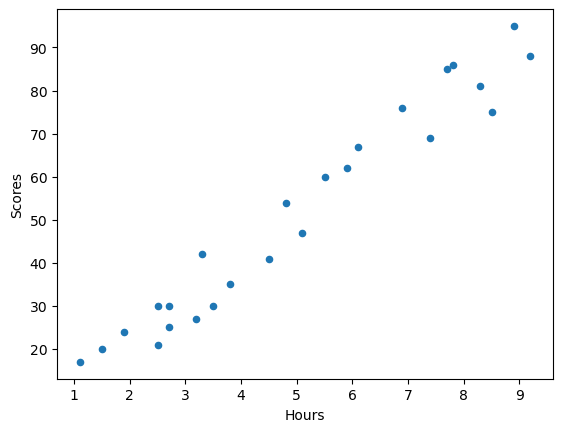

In [11]:
data.plot(kind="scatter",x="Hours",y="Scores")
plt.show()

In [12]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
hours=data["Hours"]
scores=data["Scores"]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

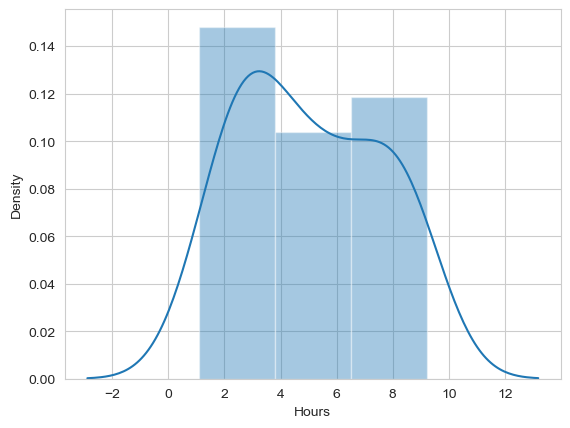

In [14]:
sns.set_style("whitegrid")
sns.distplot(hours)

In [16]:
hours.mean()

5.012

## Linear Regression Model

In [17]:
#separating the data into training and testing set
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

<AxesSubplot:>

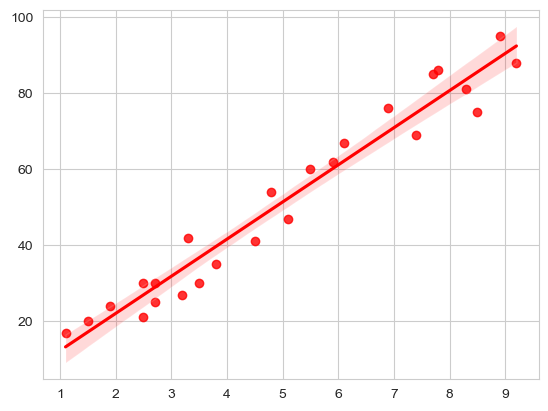

In [20]:
#regplot fits the line to the data 
sns.regplot(x=x,y=y,color="red")

In [21]:
y_pred=reg.predict(x_test)
y_pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [22]:
actual_predicted=pd.DataFrame({"Target":y_test,"Predicted":y_pred})
actual_predicted

,Target,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


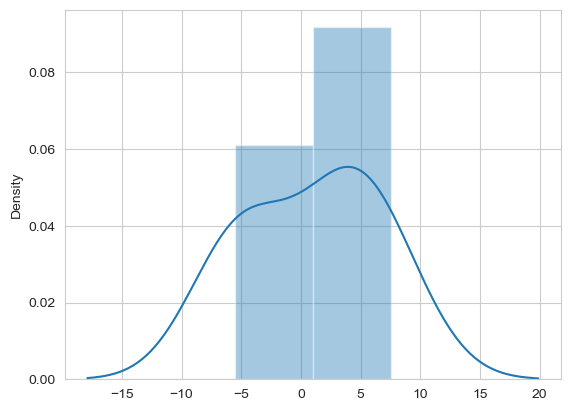

In [23]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [24]:
(y_test-y_pred).mean()

0.9226787555339889

 ###### How much does the student scores when they studies for the given period of time (Predict from the model created)

In [34]:
hrs=9.25
pred_scores=reg.predict([[hrs]])
pred_score=np.around(pred_scores,2)
print("If a student studies for {} hours per day he/she will score {}% in exams.".format (hrs,pred_score))

If a student studies for 9.25 hours per day he/she will score [92.55]% in exams.


 #### Model Evaluation

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.937597792467705
R2 Score: 0.9377551740781869


 #### Hence here the value of r-square shows that our model is 93.7% well to explai the data